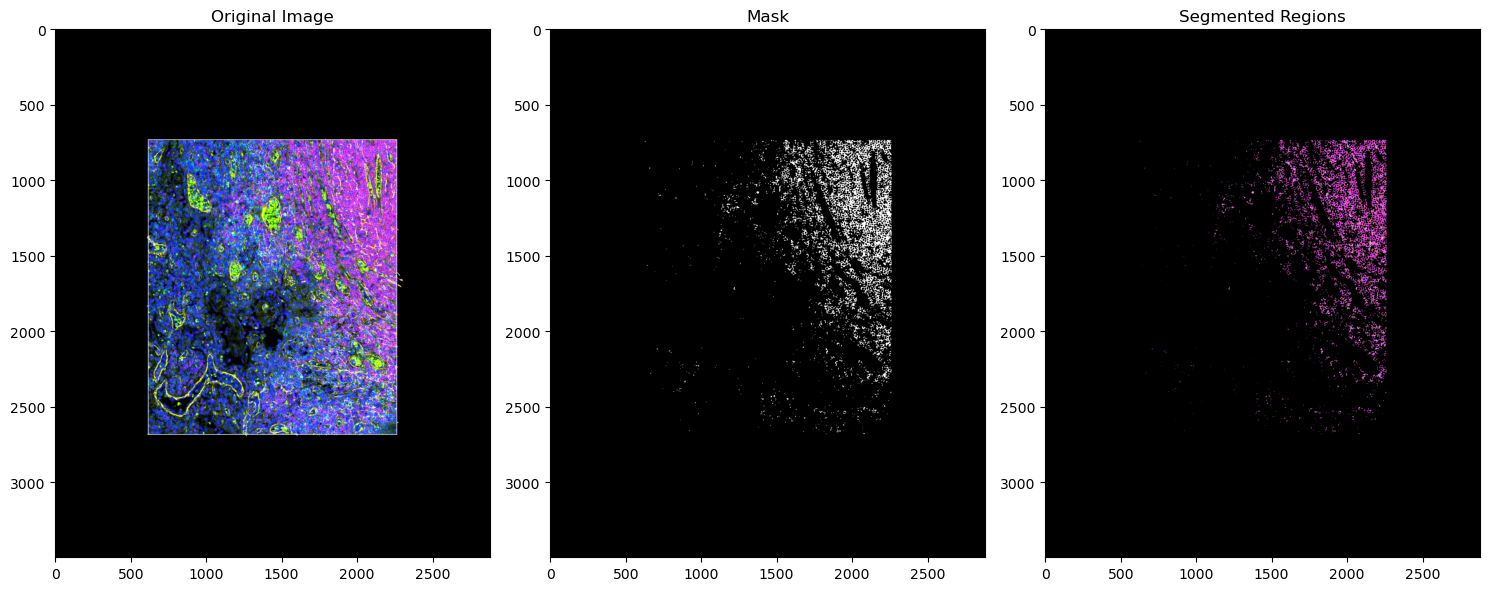

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "example_pinkCD3.tiff"
image = cv2.imread(image_path)

# Convert the image to RGB --> HSV color space
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the HSV Range (e.g. Yellow 20-50, Green 50-80)
# Pink
lower_mycolor = np.array([140, 30, 70])  # Lighter pinks
upper_mycolor = np.array([179, 255, 255])  # Bright pinks

# Create a Mask
pink_mask = cv2.inRange(hsv_image, lower_mycolor, upper_mycolor)

# Apply Morphological Operations to Clean the Mask
kernel = np.ones((3, 3), np.uint8) #smaller kernel for light regions (adjust)
mask_cleaned = cv2.morphologyEx(pink_mask, cv2.MORPH_OPEN, kernel)
mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_CLOSE, kernel)

segmented_image = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_cleaned)

# Display the Results (optional)
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_rgb)

plt.subplot(1, 3, 2)
plt.title("Mask")
plt.imshow(mask_cleaned, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Segmented Regions")
plt.imshow(segmented_image)

plt.tight_layout()
plt.show()